In [2]:
import pandas as pd
import numpy as np
from datetime import datetime
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import ttest_ind

#### 1. Import claims_data.csv and cust_data.csv which is provided to you and combine the two datasets appropriately to create a 360-degree view of the data. Use the same for the subsequent questions.
 


In [3]:
claims = pd.read_csv("C:/analytix_labs project/Data/Case Study 3 - Insurance Claims Case Study\claims.csv")
demo = pd.read_csv("C:/analytix_labs project/Data/Case Study 3 - Insurance Claims Case Study\cust_demographics.csv")

In [4]:
df = pd.merge(claims,demo,left_on='customer_id',right_on='CUST_ID',how = 'left')

#### 2. Perform a data audit for the datatypes and find out if there are any mismatch within the current datatypes of the columns and their  business significance.

In [5]:
df['claim_date']=pd.to_datetime(df['claim_date'])
df['DateOfBirth']=pd.to_datetime(df['DateOfBirth'])
df['total_policy_claims'] = pd.to_numeric(df['total_policy_claims'])


In [12]:
df.drop(['claim_id','CUST_ID','Contact'],axis=1,inplace = True)

#### 3. Convert the column claim_amount to numeric. Use the appropriate  modules/attributes to remove the $ sign.

In [7]:
df['claim_amount'] = pd.to_numeric(df['claim_amount'].replace(['\$'],'',regex=True))

#### 4. Of all the injury claims, some of them have gone unreported with the police. Create an alert flag (1,0) for all such claims.

In [11]:
df['alert_flag'] = 0
df.loc[(df['claim_type'] == 'Injury only') & (df['police_report'].isin(['No','Unknown'])), 'alert_flag'] = 1 # we are assigning 1 to all the rows that match our condition

#### 5. One customer can claim for insurance more than once and in each claim, multiple categories of claims can be involved. However, customer ID should remain unique. 

In [16]:
df.sort_values(by='claim_date', ascending=False, inplace=True) # sorting values by date so that we can filter only the recent
df.drop_duplicates(subset='customer_id', keep='first', inplace=True)# selecting only the first row

#### 6. Check for missing values and impute the missing values with an appropriate value. (mean for continuous and mode for categorical)


In [19]:
df.isna().sum()

customer_id             0
incident_cause          0
claim_date              0
claim_area              0
police_report           0
claim_type              0
claim_amount           65
total_policy_claims    10
fraudulent              0
gender                 15
DateOfBirth            15
State                  15
Segment                15
alert_flag              0
dtype: int64

In [20]:
for column in df.columns:
    if df[column].dtype == 'float64':  # For continuous variables
        mean_value = df[column].mean()
        df[column].fillna(mean_value, inplace=True)
    elif df[column].dtype == 'object':  # For categorical variables
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)
    elif df[column].dtype == 'datetime64[ns]':  # For datetime variables
        mode_value = df[column].mode()[0]
        df[column].fillna(mode_value, inplace=True)

In [21]:
df.isna().sum()

customer_id            0
incident_cause         0
claim_date             0
claim_area             0
police_report          0
claim_type             0
claim_amount           0
total_policy_claims    0
fraudulent             0
gender                 0
DateOfBirth            0
State                  0
Segment                0
alert_flag             0
dtype: int64

####  7. Calculate the age of customers in years. Based on the age, categorize the customers according to the below criteria
Children < 18
Youth 18-30
Adult 30-60
Senior > 60

In [22]:
current_year = pd.Timestamp.now().year
df['age'] = current_year - df['DateOfBirth'].dt.year

In [23]:
bins = [0, 18, 30, 60, float('inf')]
labels = ['Children', 'Youth', 'Adult', 'Senior']

# Create bins in the age column
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=False)

In [24]:
df

,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Segment,alert_flag,age,age_group
282,93915431,Other causes,2018-10-30,Auto,No,Material and injury,42124.500000,1.0,Yes,Male,2067-09-08,ME,Gold,0,-43,NaN
350,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20,NE,Gold,0,48,Adult
1077,65208809,Natural causes,2018-10-30,Auto,No,Material only,2290.000000,1.0,No,Male,2064-04-22,VA,Platinum,0,-40,NaN
1086,49290530,Natural causes,2018-10-30,Auto,No,Material only,2875.000000,1.0,Yes,Male,1974-02-14,NY,Gold,0,50,Adult
751,28932340,Driver error,2018-10-30,Auto,Unknown,Material only,12475.499514,1.0,No,Male,1996-01-05,LA,Gold,0,28,Youth
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
177,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,Female,1994-07-24,MA,Platinum,0,30,Adult
191,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14,NM,Silver,0,50,Adult
116,39587790,Other causes,2017-01-01,Auto,No,Material only,2967.000000,1.0,Yes,Male,2065-01-10,LA,Gold,0,-41,NaN
308,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.000000,3.0,No,Male,1975-11-23,NC,Silver,0,49,Adult


In [30]:
# as we can see above the age column has date that is in the future hence it is wrong so we will drop such rows
df.dropna(axis=0, inplace=True)

In [31]:
df

,customer_id,incident_cause,claim_date,claim_area,police_report,claim_type,claim_amount,total_policy_claims,fraudulent,gender,DateOfBirth,State,Segment,alert_flag,age,age_group
350,38011078,Crime,2018-10-30,Auto,Unknown,Material only,1940.000000,1.0,No,Female,1976-05-20,NE,Gold,0,48,Adult
1086,49290530,Natural causes,2018-10-30,Auto,No,Material only,2875.000000,1.0,Yes,Male,1974-02-14,NY,Gold,0,50,Adult
751,28932340,Driver error,2018-10-30,Auto,Unknown,Material only,12475.499514,1.0,No,Male,1996-01-05,LA,Gold,0,28,Youth
318,77510822,Other driver error,2018-10-30,Auto,Unknown,Material only,12475.499514,2.0,No,Female,1986-03-18,AK,Silver,0,38,Adult
941,46710738,Driver error,2018-10-30,Auto,No,Material only,1830.000000,1.0,No,Male,1977-04-28,MO,Gold,0,47,Adult
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
173,74155265,Natural causes,2017-01-01,Auto,No,Material only,2080.000000,1.0,No,Male,1985-11-16,TX,Gold,0,39,Adult
177,61745840,Other driver error,2017-01-01,Home,No,Material and injury,30930.000000,1.0,No,Female,1994-07-24,MA,Platinum,0,30,Adult
191,64840478,Other driver error,2017-01-01,Auto,Unknown,Material and injury,17290.000000,1.0,No,Female,1974-02-14,NM,Silver,0,50,Adult
308,65176092,Other causes,2017-01-01,Auto,No,Material and injury,37290.000000,3.0,No,Male,1975-11-23,NC,Silver,0,49,Adult


#### 8. What is the average amount claimed by the customers from various segments?

In [35]:
df.groupby(by = 'age_group')['claim_amount'].mean()

age_group
Children             NaN
Youth       12019.950320
Adult       12688.999098
Senior               NaN
Name: claim_amount, dtype: float64

####  9. What is the total claim amount based on incident cause for all the claims that have been done at least 20 days prior to 1st of October, 2018.

In [38]:
prior_date =pd.Timestamp('2018-10-01') - pd.Timedelta(days=20)
# Filter the DataFrame to include only claims that occurred at least 20 days prior to the cutoff date
filtered = df[df['claim_date'] <= prior_date]

In [39]:
filtered.groupby(by = 'incident_cause')['claim_amount'].sum()

incident_cause
Crime                 4.016385e+05
Driver error          2.336762e+06
Natural causes        8.971630e+05
Other causes          2.357739e+06
Other driver error    2.131442e+06
Name: claim_amount, dtype: float64

#### 10. How many adults from TX, DE and AK claimed insurance for driver related issues and causes? 

In [43]:
filtered_data = df[(df['State'].isin(['TX','DE','AK'])) & (df['age_group']== 'Adult') & (df['incident_cause'].str.contains('driver', case=False))]

In [45]:
filtered_data['State'].value_counts()

DE    9
AK    6
TX    5
Name: State, dtype: int64

#### 11. Draw a pie chart between the aggregated value of claim amount based on gender and segment. Represent the claim amount as a percentage on the pie chart.


<AxesSubplot:ylabel='claim_amount'>

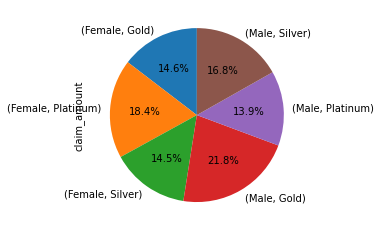

In [47]:
data = df.groupby(['gender','Segment'])['claim_amount'].sum()
data.plot(kind='pie', autopct='%1.1f%%', startangle=90)

#### 12. Among males and females, which gender had claimed the most for any type of driver related issues? E.g. This metric can be compared using a bar chart

In [52]:
data = df[df['incident_cause'].str.contains('driver',case=False)].groupby('gender')['claim_type'].count()

<AxesSubplot:xlabel='gender'>

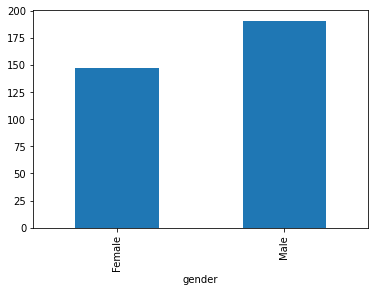

In [54]:
data.plot(kind = 'bar')

#### 13. Which age group had the maximum fraudulent policy claims? Visualize it on a bar chart.

In [57]:
data = df[df['fraudulent']=='Yes'].groupby('age_group')['age_group'].count()

<AxesSubplot:xlabel='age_group'>

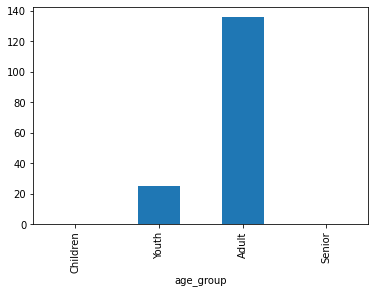

In [58]:
data.plot(kind = 'bar')

#### 14. Visualize the monthly trend of the total amount that has been claimed by the customers. Ensure that on the “month” axis, the month is in a chronological order not alphabetical order. 

In [59]:
df['month'] = df['claim_date'].dt.to_period('M')

In [61]:
monthly_data = df.groupby('month')['claim_amount'].sum()

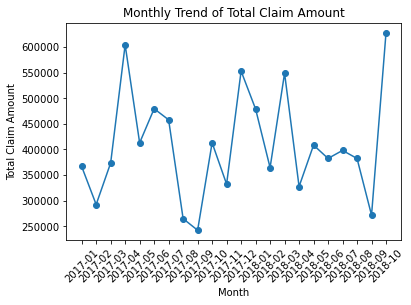

In [64]:
plt.plot(monthly_data.index.astype(str), monthly_data.values, marker='o')
plt.xlabel('Month')
plt.ylabel('Total Claim Amount')
plt.title('Monthly Trend of Total Claim Amount')
plt.xticks(rotation=45)  
plt.show()

#### 15. What is the average claim amount for gender and age categories andsuitably represent the above using a facetted bar chart, one facet that represents fraudulent claims and the other for non-fraudulent claims.

In [66]:
grouped_data = df.groupby(['gender', 'age_group', 'fraudulent'])['claim_amount'].mean().reset_index()

<Figure size 864x576 with 0 Axes>

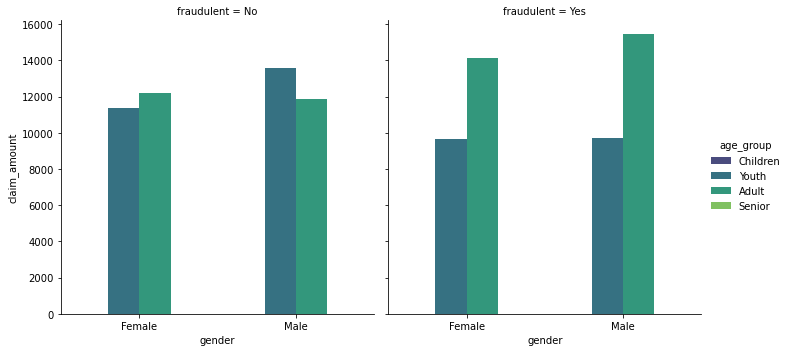

In [68]:
plt.figure(figsize=(12, 8))
sns.catplot(
    x='gender', y='claim_amount', hue='age_group', col='fraudulent',
    kind='bar', data=df, ci=None, palette='viridis'
)
plt.show()

####  16. Is there any similarity in the amount claimed by males and females?

<AxesSubplot:xlabel='gender'>

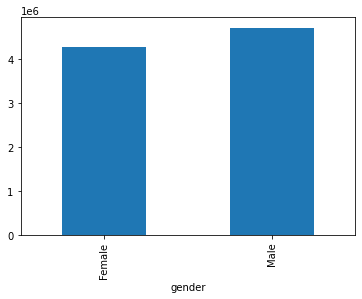

In [73]:
data = df.groupby('gender')['claim_amount'].sum()
data.plot(kind='bar')

##### As we can see they are almost simlar in the claim amout but the males have a bit higher claim amout

### 17. Is there any relationship between age category and segment?

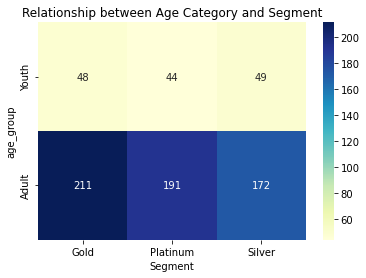

In [76]:
cross_tab = pd.crosstab(df['age_group'], df['Segment'])
heatmap = sns.heatmap(cross_tab, annot=True, cmap="YlGnBu", fmt="d")
heatmap.set_title('Relationship between Age Category and Segment')
plt.show()

#### We can see that Adults and Segment have a strong correlation, many adults fall in the gold category

### 18. The current year has shown a significant rise in claim amounts ascompared to 2016-17 fiscal average which was $10,000

In [80]:
df['claim_amount'].mean()

12557.060807188918

##### we can see that we have gained 2557 dollars more than the last fiscal year

### 19. Is there any difference between age groups and insurance claims?

<AxesSubplot:xlabel='age_group'>

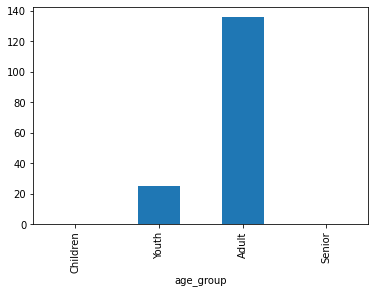

In [81]:
data = df[df['fraudulent']=='Yes'].groupby('age_group')['age_group'].count()
data.plot(kind = 'bar')

##### As we can clearly see there is a significant difference between age groups and claims. Adults have claimed much more than the youth


### 20. Is there any relationship between total number of policy claims and the claimed amount?

<AxesSubplot:xlabel='total_policy_claims', ylabel='claim_amount'>

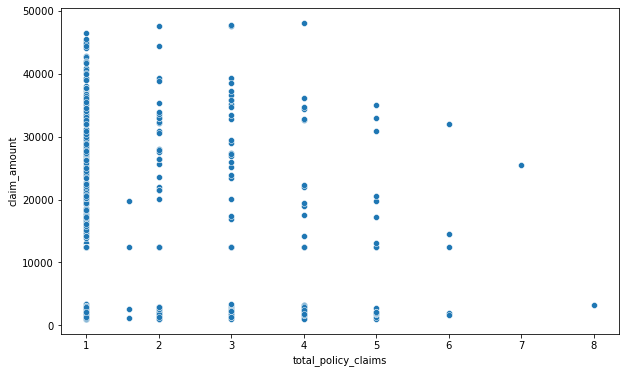

In [84]:
df['total_policy_claims'] = df.groupby('customer_id')['total_policy_claims'].transform('sum')


plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='total_policy_claims', y='claim_amount')


In [83]:
correlation_coefficient = df['total_policy_claims'].corr(df['claim_amount'])
print(f"Pearson Correlation Coefficient: {correlation_coefficient}")

Pearson Correlation Coefficient: -0.012185037186423192


#### We can see that the pearsons cofficient is close to 0 hence it does not have any correlation